In [2]:
import pandas as pd
import numpy as np
import scipy as sp
import os
import json
import pprint
from IPython.core.display import display
%matplotlib inline
import tweepy
import networkx as nx
import random
from pyvis.network import Network
from functions_file import *
data_folder = "data"
print("imported completed!")

imported completed!


In [3]:
consumer_key = "GvDHFIS3fpCfZR2hwEGhE5oCZ"
consumer_secret = "LCwgUZgFOjJppd4jg6Cf4mgohUTc6Ro7Yaals87LdNLmS3d9zB"
access_token = "810960428385890304-aVlOFR9EExKdDPZCsh5EDN5Nm9SUmb9"
access_secret = "XJkr9dKABPkSvRIgpyQeNapg2o6ldP4VoNbTids9QXGWT"
bearer_token = "AAAAAAAAAAAAAAAAAAAAAA8UJQEAAAAAOD26yUUUPHF9zeAe56TtzGYUK8Q%3DRh6u9TAI7T7b5TJABTBOP5WwWSL0Cbvv5a6JJwg8MursyOOt9L"

In [4]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)
if api.verify_credentials :
  print ('Authentication completed successfully!')

Authentication completed successfully!


In [13]:
users = ["lucabazzetto","Tomve99"]
#usersID = usersID(users)
quantity = 4
followers = {}
for user in users:
    followers_of_user = []
    for follow in tweepy.Cursor(
        api.followers,
        screen_name = user,
        skip_status=True,
        include_user_entities = False
    ).items(quantity):
        json_data = follow._json
        if json_data not in followers_of_user:
            followers_of_user.append(json_data["screen_name"])
    followers[user] = followers_of_user
serialize_json(data_folder,"followersLucaThomas.json", followers)

Data serialized to path: data/followersLucaThomas.json


In [12]:
users = ["lucabazzetto","Tomve99"]
quantity = 4
friends = {}
for user in users:
    friends_of_user = []
    for friend in tweepy.Cursor(
        api.friends,
        screen_name = user,
        skip_status=True,
        include_user_entities = False
    ).items(quantity):
        json_data = friend._json
        friends_of_user.append(friend._json["screen_name"])
    friends[user] = friends_of_user
serialize_json(data_folder,"friendsLucaThomas.json", friends)

Data serialized to path: data/friendsLucaThomas.json


In [5]:

def random_json_with_control(json_array, quantity, all):
    a = quantity
    array = []
    while(a!=0):
        item = random.choice(json_array)
        if item not in array and item not in all:
            array.append(item)
            a = a-1
    return array

followersALL = read_json(f"{data_folder}/followersLucaThomas.json")
fiveFollowers = []

# Estraggo per ogni utente 5 followers
for user in followersALL:
    fiveFollowers.extend(random_json_with_control(followersALL[user], 1, fiveFollowers))

quantity = 2
followersOfFollowers = {}

for user in fiveFollowers:
    followers_of_user = []
    for follower in tweepy.Cursor(
        api.followers,
        screen_name = user,
        skip_status=True,
        include_user_entities = False
    ).items(quantity):
        json_data = follower._json
        followers_of_user.append(follower._json["screen_name"])
    followersOfFollowers[user] = followers_of_user

serialize_json(data_folder,"followersOfFollowers.json", followersOfFollowers)

Data read fron path: data/followersLucaThomas.json
Data serialized to path: data/followersOfFollowers.json


In [6]:
friendsALL = read_json(f"{data_folder}/friendsLucaThomas.json")
fiveFriends = []

# Estraggo per ogni utente 5 followers
for user in friendsALL:
    fiveFriends.extend(random_json_with_control(friendsALL[user], 2, fiveFriends))

quantity = 2
friendsOfFriends = {}
for user in fiveFriends:
    friends_of_user = []
    for friend in tweepy.Cursor(
        api.friends,
        screen_name = user,
        skip_status=True,
        include_user_entities = False
    ).items(quantity):
        json_data = friend._json
        friends_of_user.append(friend._json["screen_name"])
    friendsOfFriends[user] = friends_of_user
serialize_json(data_folder,"friendsOfFriends.json", friendsOfFriends)

Data read fron path: data/friendsLucaThomas.json
Data serialized to path: data/friendsOfFriends.json


In [7]:
allFriends = {}
allFriends.update(read_json(f"{data_folder}/friendsOfFriends.json"))
allFriends.update(read_json(f"{data_folder}/followersOfFollowers.json"))
allFriends.update(read_json(f"{data_folder}/followersLucaThomas.json"))
allFriends.update(read_json(f"{data_folder}/friendsLucaThomas.json"))
#serialize_json(data_folder,"allFriends.json", allFriends)
#pprint.PrettyPrinter().pprint(allFriends)

vector = []
for (k,v) in allFriends.items():
    for item in v:
        if item not in vector:
            vector.append(item)

serialize_json(data_folder,"NODUPLICATI.json", vector)

vector = read_json(f"{data_folder}/NODUPLICATI.json")

puntoQuattro = {}
for user in vector:
    json_data = api.get_user(user)._json
    foundInfo = {}
    foundInfo ['id'] = json_data['id']
    foundInfo ['name'] = json_data['name']
    foundInfo ['screen_name'] = json_data['screen_name']
    foundInfo ['location'] = json_data['location']
    foundInfo ['followers_count'] = json_data['followers_count']
    foundInfo ['friends_count'] = json_data['friends_count']
    puntoQuattro[user] = foundInfo
serialize_json(data_folder,"puntoQuattroProva.json", puntoQuattro)

Data read fron path: data/friendsOfFriends.json
Data read fron path: data/followersOfFollowers.json
Data read fron path: data/followersLucaThomas.json
Data read fron path: data/friendsLucaThomas.json
Data serialized to path: data/NODUPLICATI.json
Data serialized to path: data/puntoQuattro.json


In [20]:
#salvo in un dataframe le relazioni
def is_following(sourceid,targetid, api):
    friendship = api.show_friendship(source_screen_name=sourceid, target_screen_name=targetid)
    if friendship[0].following:
        return True
    return False

files = read_json(f"{data_folder}/NODUPLICATI.json")
sourceTarget = {}
index = 0
for source in files:
    for target in files:
        isFollowing = is_following(source,target,api)
        if isFollowing:
            sourceTargetTemp = {}
            sourceTargetTemp["Source"] = source
            sourceTargetTemp["Taget"] = target
            sourceTarget[index] = sourceTargetTemp
            index = index + 1

serialize_json(data_folder,"prova.json", sourceTarget)
df = pd.DataFrame.from_dict(sourceTarget,orient='index')
display(df)
df.to_csv("sourceTarget.csv", index=False, encoding='utf-8')

Data read fron path: data/NODUPLICATI.json
Data serialized to path: data/prova.json


,Source,Taget
0,crispy_mcbacon,ciccio_feltri
1,crispy_mcbacon,lucabazzetto
2,ciccio_feltri,crispy_mcbacon
3,ciccio_feltri,lucabazzetto
4,lucabazzetto,crispy_mcbacon
5,lucabazzetto,ciccio_feltri
6,lucabazzetto,elonmusk


In [21]:
allDetailsFromUsers = read_json(f"{data_folder}/puntoQuattroProva.json")
dfUsersDetails = pd.DataFrame.from_dict(allDetailsFromUsers,orient='index')
dfUsersFriendship = pd.read_csv("sourceTarget.csv")
display(dfUsersFriendship)
graph = nx.Graph()
#aggiunta membri gruppo come attributi
graph.graph["members"] = ["Luca","Thomas","Agustin","Edoardo"]


for index,row in dfUsersDetails.iterrows():
    graph.add_node(row['id'], name = row['name'],screen_name=row['screen_name'],location = row['location'],followers_count = row['followers_count'],friends_count = row['friends_count'])

for index, row in dfUsersFriendship.iterrows():
    graph.add_edge(row["Source"], row["Target"])

nx.write_gpickle(graph,"data/graph.pkl")

Data read fron path: data/puntoQuattroProva.json


,Source,Taget
0,crispy_mcbacon,ciccio_feltri
1,crispy_mcbacon,lucabazzetto
2,ciccio_feltri,crispy_mcbacon
3,ciccio_feltri,lucabazzetto
4,lucabazzetto,crispy_mcbacon
5,lucabazzetto,ciccio_feltri
6,lucabazzetto,elonmusk


KeyError: 'Target'

In [ ]:
graph = nx.read_gpickle("data/graph.pkl")
nt = Network(
    height="100%",
    width="100%",
    bgcolor="222222",
    font_color="white",
    heading="progetto"
)
nt.barnes_hut()
nt.from_nx(graph)
neighbor_map = nt.get_adj_list()
for node in nt.nodes:
    node["Value"] = len(neighbor_map[node['screen_name']])
nt.show("grafico.html")

In [ ]:
#GRAFO ORIENTATO
allDataPoint4 = read_json(f"{data_folder}/puntoQuattro.json")
graph = nx.DiGraph()
graph.add_nodes_from(allDataPoint4)

#graph.graph["members"] = ["Luca","Thomas","Agustin","Edoardo"]

for user in allDataPoint4:
    for user2 in allDataPoint4:
        friendship = api.show_friendship(source_screen_name = user,target_screen_name = user2)
        if friendship[0].followed_by:
            graph.add_edge(user2,user)
        if friendship[0].following:
            graph.add_edge(user,user2)

nx.write_gpickle(graph,"data/graphOriented.pkl")

In [ ]:
#GRAFO NON ORIENTATO
allDataPoint4 = read_json(f"{data_folder}/puntoQuattro.json")
graph = nx.Graph()
graph.add_nodes_from(allDataPoint4)

#graph.graph["members"] = ["Luca","Thomas","Agustin","Edoardo"]

for user in allDataPoint4:
    for user2 in allDataPoint4:
        friendship = api.show_friendship(source_screen_name = user,target_screen_name = user2)
        if friendship[0].followed_by | friendship[0].following:
            graph.add_edge(user,user2)

nx.write_gpickle(graph,"data/graphNoOriented.pkl")

In [ ]:
graph = nx.read_gpickle("data/graphNoOriented.pkl")
nt = Network(
    height="100%",
    width="100%",
    bgcolor="222222",
    font_color="white",
    heading="progetto"
)
nt.barnes_hut()
nt.from_nx(graph)
neighbor_map = nt.get_adj_list()
for node in nt.nodes:
    node["Value"] = len(neighbor_map[node['id']])
nt.show("grafico.html")

In [ ]:
username = "lucabazzetto"
quantity = 10
AllUsers = {}
dataOfUser = []
for follower in tweepy.Cursor(
    api.followers,
    screen_name = username,
    skip_status=True,
    include_user_entities = False
).items(quantity):
    dataOfUser.append(follower._json["screen_name"])

for friend in tweepy.Cursor(
    api.friends,
    screen_name = username,
    skip_status=True,
    include_user_entities = False
).items(quantity):
    jsonData = friend._json["screen_name"]
    if jsonData not in dataOfUser:
        dataOfUser.append(jsonData)

AllUsers[username] = dataOfUser
serialize_json(data_folder,"lucabazzettoALL.json", AllUsers)

In [39]:
#punto 7/8/9
from networkx.algorithms.distance_measures import center

noOriented = nx.read_gpickle("data/graphNoOriented.pkl")
oriented = nx.read_gpickle("data/graphOriented.pkl")
if(nx.is_connected(noOriented)):
    print("Grafo connesso"),
    print("Centro: ", end=" ")
    print(nx.center(noOriented))
    print("Diametro: ", end=" ")
    print(nx.diameter(noOriented))
    print("Raggio: ", end=" ")
    print(nx.radius(noOriented))
    
    
else:
    print("Grafo non connesso")
    
if(nx.is_bipartite(noOriented)):
    print("Grafo bipartito")
else:
    print("Grafo non bipartito")
    

    
 #la centralità del mezzo è una misura della centralità in un grafico basato sui percorsi più brevi
bet = nx.betweenness_centrality(noOriented)
close = nx.closeness_centrality(noOriented)
degree = nx.degree_centrality(noOriented)
ind = nx.in_degree_centrality(oriented)
outd = nx.out_degree_centrality(oriented)
pr = nx.pagerank(oriented)
hits = nx.hits(noOriented)

print("Centralità del mezzo: ", end=" ")
print(bet)
print(" ")
print("Centralità della vicinanza: ", end=" ")
print(close)
print(" ")
print("Centralità di grado: ", end=" ")
print(degree)
print(" ")

print("In-degree centrality: ", end=" ")
print(ind)
print(" ")
print("Out-degree centrality: ", end=" ")
print(outd)
print(" ")
#Da vedere se bisogna modificare alpha (non so cosa sia) e altri parametri
print("Page Rank: ", end=" ")
print(pr)
print(" ")
#Vengono ripetuti 2 volte i dati
print("HITS: ", end=" ")
print()

Grafo non connesso
Grafo non bipartito
Centralità del mezzo:  {'crispy_mcbacon': 0.0, 'ciccio_feltri': 0.047619047619047616, 'lucabazzetto': 0.14285714285714285, 'elonmusk': 0.0, 'Tomve99': 0.047619047619047616, 'giucruciani': 0.0, 'Miriam_58646': 0.0, 'GoldenYoann3D': 0.0}
 
Centralità della vicinanza:  {'crispy_mcbacon': 0.5102040816326531, 'ciccio_feltri': 0.5952380952380952, 'lucabazzetto': 0.7142857142857143, 'elonmusk': 0.44642857142857145, 'Tomve99': 0.5952380952380952, 'giucruciani': 0.44642857142857145, 'Miriam_58646': 0.0, 'GoldenYoann3D': 0.0}
 
Centralità di grado:  {'crispy_mcbacon': 0.42857142857142855, 'ciccio_feltri': 0.5714285714285714, 'lucabazzetto': 0.7142857142857142, 'elonmusk': 0.2857142857142857, 'Tomve99': 0.5714285714285714, 'giucruciani': 0.2857142857142857, 'Miriam_58646': 0.0, 'GoldenYoann3D': 0.0}
 
In-degree centrality:  {'crispy_mcbacon': 0.42857142857142855, 'ciccio_feltri': 0.42857142857142855, 'lucabazzetto': 0.42857142857142855, 'elonmusk': 0.2857142

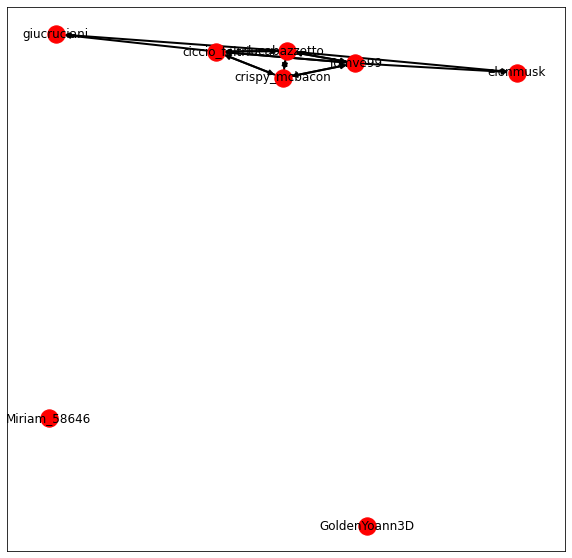

In [4]:
#Provo a disegnarlo (non scritto nella consegna)
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 10,10

nx.draw_networkx(
    oriented,
    pos = nx.spring_layout(oriented),
    node_color = "#FF0000",
    width = 2,
    edge_cmap = plt.cm.Blues,
    with_labels = True
)
plt.show()
plt.close()


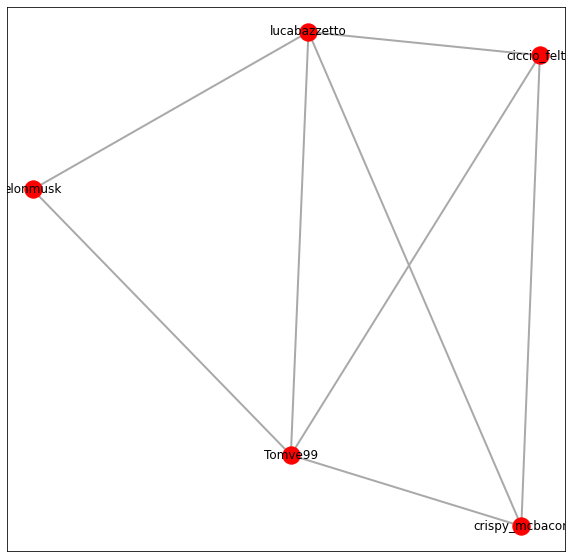

In [10]:
#punto 10 (non richiesto il disegno)

oriented = nx.read_gpickle("data/graphOriented.pkl")
tomve99 = nx.ego_graph(noOriented, "Tomve99", radius=1)

nx.draw_networkx(
    tomve99,
    pos = nx.spring_layout(tomve99),
    node_color = "#FF0000",
    edge_color = "#A9A9A9",
    width = 2,
    edge_cmap = plt.cm.Blues,
    with_labels = True
)
plt.savefig("data/tomve99.pdf")
plt.show()
plt.close()

In [18]:
#punto 10b-c
from networkx.algorithms.approximation import clique

print("Cricca massima: ", end=" ")
print(clique.max_clique(tomve99))
print(" ")

print("Dimensione della cricca massima: ", end=" ")
print(clique.large_clique_size(tomve99))
print(" ")

Cricca massima:  {'ciccio_feltri', 'lucabazzetto', 'Tomve99', 'crispy_mcbacon'}
 
Dimensione della cricca massima:  4
 


In [ ]:
#Punto 11
#Per ora non funziona perché il grafo ha alcuni nodi senza archi
print("Copertura minima degli archi: ", end=" ")
print(nx.min_edge_cover(noOriented))
print(" ")


In [26]:
#Punto 12
#Per ora non funziona perché il grafo ha alcuni nodi senza archi
print("Coefficiente omega: ", end=" ")
print(nx.omega(tomve99))
print(" ")
print("Coefficiente sigma: ", end=" ")
print(nx.sigma(tomve99))
print(" ")
#Come si fa a stimare la small-world-ness? basta calcolare omega e sigma?

Coefficiente omega:  -2.220446049250313e-16
 
Coefficiente sigma:  0.9999999999999998
 


In [35]:
from scipy import stats
bet = nx.betweenness_centrality(noOriented)
close = nx.closeness_centrality(noOriented)
degree = nx.degree_centrality(noOriented)
ind = nx.in_degree_centrality(oriented)
outd = nx.out_degree_centrality(oriented)
pr, hits 


pearson = np.array([bet, close, degree, ind, outd])
stats.stats.pearsonr(bet, close)

IndexError: too many indices for array: array is 0-dimensional, but 1 were indexed

In [38]:



from scipy import stats
a = np.array([0, 0, 0, 1, 1, 1, 1])
b = np.arange(7)
stats.pearsonr(a, b)

[0 1 2 3 4 5 6]
